**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

**LOADING THE DATA**

In [3]:
df_price = pd.read_csv('house_prices_data.csv')
df_price.head(20)

,Square_Footage,Num_Bedrooms,House_Age,House_Price
0,3674,1,61,608468.9407
1,1360,5,57,335254.9957
2,1794,5,51,402370.0907
3,1630,2,11,311854.2980
4,1595,5,38,379356.5904
5,3592,2,1,628342.8506
6,2138,1,2,376799.2593
7,2669,4,55,513597.1237
8,966,4,80,264331.6821
9,1738,4,58,365954.5235


In [4]:
df_price.shape

(100, 4)

In [5]:
df_price.isna().sum()

Square_Footage    0
Num_Bedrooms      0
House_Age         0
House_Price       0
dtype: int64

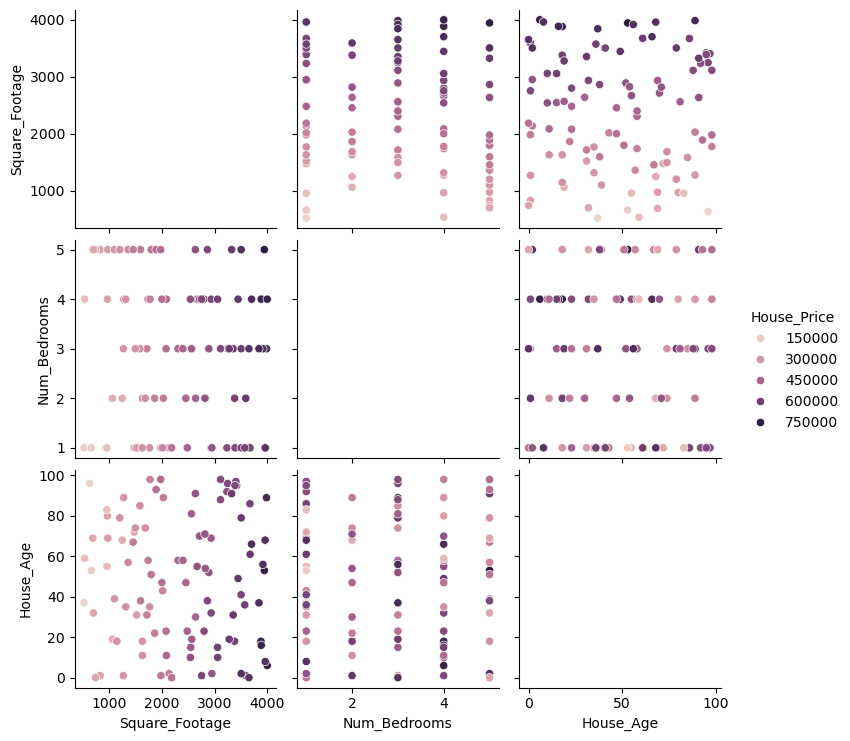

In [6]:
sns.pairplot(df_price , hue='House_Price')

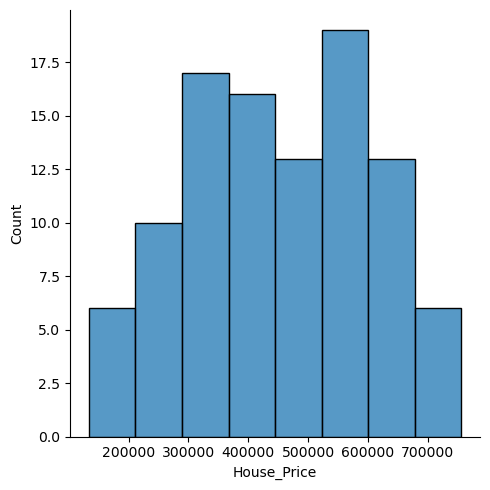

In [7]:
sns.displot(df_price , x='House_Price')

**Show the relationship between square footage and house price**

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

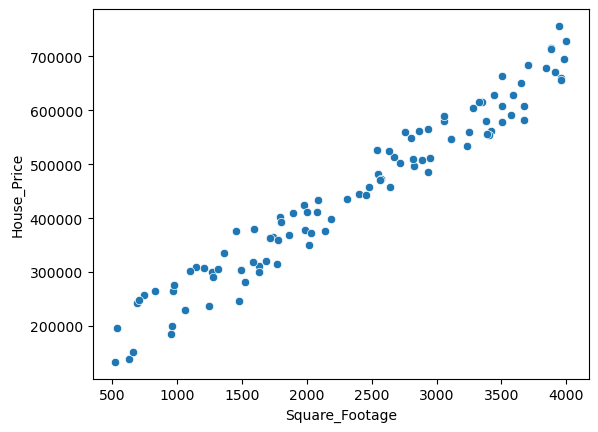

In [8]:
sns.scatterplot(x=df_price['Square_Footage'] , y=df_price['House_Price'])

**Show the distribution of house prices for different numbers of bedrooms**

<Axes: xlabel='Num_Bedrooms', ylabel='House_Price'>

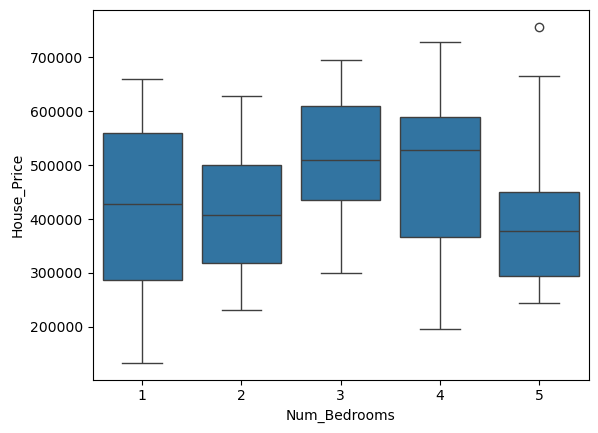

In [14]:
sns.boxplot(x=df_price['Num_Bedrooms'] , y=df_price['House_Price'])

**Show the relationship between house age and house price.**

<Axes: xlabel='House_Age', ylabel='House_Price'>

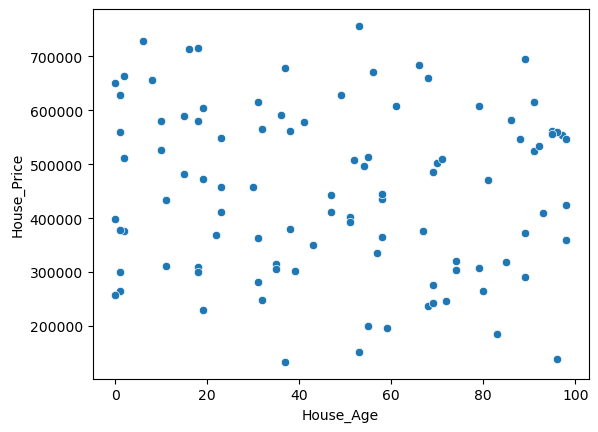

In [15]:
sns.scatterplot(x=df_price['House_Age'] , y=df_price['House_Price'])

**Display the correlation coefficients between features.**

<Axes: >

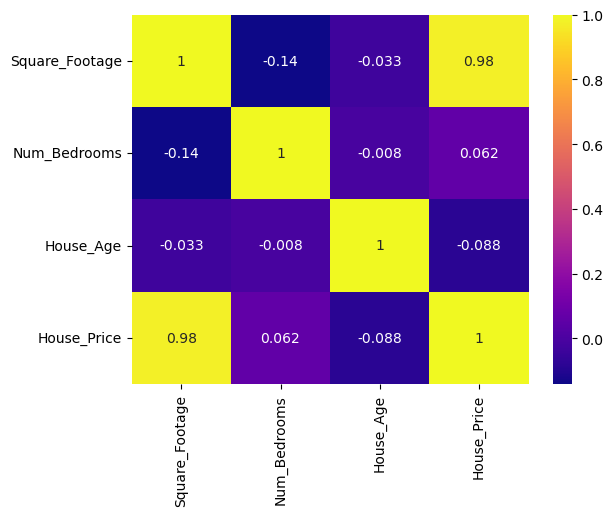

In [17]:
sns.heatmap(df_price.corr(), annot=True, cmap='plasma')

**Split the data into training and testing sets (80% training, 20% testing).**

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_price, test_size=0.2, random_state=42)

In [21]:
train

,Square_Footage,Num_Bedrooms,House_Age,House_Price
55,2714,4,70,501740.9918
88,2949,1,2,510595.2659
26,1455,5,67,375989.3805
42,689,5,69,243613.2979
69,1890,5,93,409860.2587
...,...,...,...,...
60,2561,3,81,470533.5125
71,1978,5,98,425068.2300
14,3671,1,86,581664.2984
92,701,5,32,248260.6175


In [22]:
test

,Square_Footage,Num_Bedrooms,House_Age,House_Price
83,3961,1,8,655967.2309
53,2568,3,19,472581.8174
70,3503,1,41,577737.1456
45,3505,5,2,664347.9913
44,3234,1,92,533851.1255
39,3247,3,96,560114.7890
22,3985,3,89,694694.3345
80,3959,1,68,659379.8179
10,830,5,1,264601.0537
0,3674,1,61,608468.9407


In [26]:
X_train = train[['Square_Footage', 'Num_Bedrooms', 'House_Age']]
y_train = train['House_Price']

X_test = test[['Square_Footage', 'Num_Bedrooms', 'House_Age']]
y_test = test['House_Price']

**o Implement a Multiple Linear Regression model using scikit-learn.
o Train the model on the training data.**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([659407.64686351, 488308.64041943, 581082.01683965, 677270.65419053,
       526397.12412496, 569853.78227745, 683385.77525949, 642630.82243441,
       272996.84124744, 601451.4141265 , 708295.42288124, 709600.73336615,
       584503.11473511, 253781.27390842, 413257.39264816, 378530.93022492,
       542523.52015685, 657462.13737409, 521260.94334495, 131203.37812277])

In [32]:
df = pd.DataFrame({"y_test" : y_test, "y_pred" 
                   : y_pred, "diff between y_pred and y_test" :abs(y_pred-y_test)})
df

,y_test,y_pred,diff between y_pred and y_test
83,655967.2309,659407.646864,3440.415964
53,472581.8174,488308.640419,15726.823019
70,577737.1456,581082.016840,3344.871240
45,664347.9913,677270.654191,12922.662891
44,533851.1255,526397.124125,7454.001375
39,560114.7890,569853.782277,9738.993277
22,694694.3345,683385.775259,11308.559241
80,659379.8179,642630.822434,16748.995466
10,264601.0537,272996.841247,8395.787547
0,608468.9407,601451.414127,7017.526573


In [33]:
model.score(X_train, y_train)

0.9954223677024361

**Calculate and display the Mean Squared Error (MSE) of the predictions and r2 score of 
the model.**

In [34]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

print(f'R-squared: {r2}')

Mean Squared Error: 91726130.74595359
R-squared: 0.9965233213496424


**Create a scatter plot comparing the actual and predicted values of the target variable for 
the test set.**

Text(0, 0.5, 'Predicted Value')

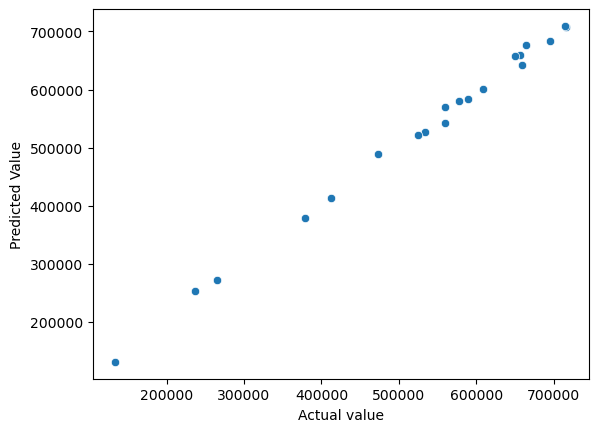

In [36]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual value')
plt.ylabel("Predicted Value")

**Implement a function that takes input features and returns the predicted house price**

In [41]:
def predict_house_price(square_footage, num_bedrooms, house_age):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })
    predicted_price = model.predict(input_features)
    return predicted_price[0]
predicted_price = predict_house_price(2500, 4, 10)
print(f"Predicted House Price: ${predicted_price:.2f}")


Predicted House Price: $501790.41


**Determine feature importance and visualize it**

C:\Users\saadk\AppData\Local\Temp\ipykernel_13664\2650105692.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.abs(model.coef_), y=X_train.columns, orient='h', palette='Blues_d').set(title='Feature Importance in the Linear Regression Model')


[Text(0.5, 1.0, 'Feature Importance in the Linear Regression Model')]

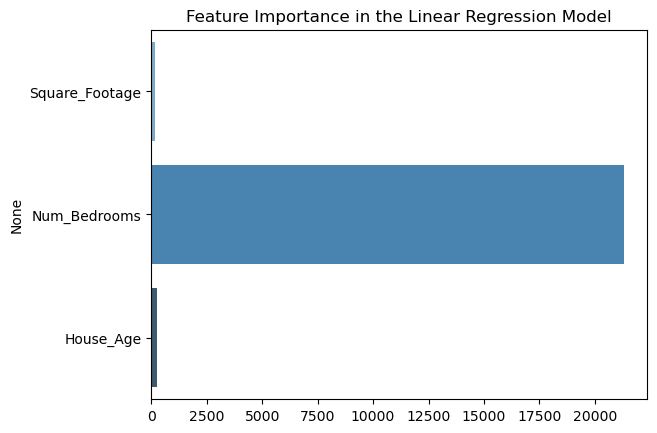

In [43]:
coefficients = model.coef_
feature_names = X_train.columns


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x=np.abs(model.coef_), y=X_train.columns, orient='h', palette='Blues_d').set(title='Feature Importance in the Linear Regression Model')


**Normalize the data using StandardScaler from scikit-learn and check its impact on the 
model performance**

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (Scaled Data): {mse_scaled:.4f}')
print(f'R-squared (Scaled Data): {r2_scaled:.4f}')

Mean Squared Error (Scaled Data): 91726130.7460
R-squared (Scaled Data): 0.9965
